#Probability Density Estimation Using KDE

In [ ]:
from google.colab import files
files.upload()

Saving Dataset_Interevents.xlsx to Dataset_Interevents.xlsx


{'Dataset_Interevents.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00It\x99R\x1f#\xcf\x03\xc0\x00\x00\x00\x13\x02\x00\x00\x0b\x00\x00\x00_rels/.rels\xad\x92O\x8b\xc2@\x0c\xc5\xbfJ\x99\xfb\x1aW\xc1\xc3b=y\xe9mY\xfc\x02q&\xfdC;\x93!\x13\xb1~{\x87\xbdl\xb7TP\xf0\x18^\xf2\xde\x8fG\xf6?4\xa0v\x1cR\xdb\xc5T\x8c~\x08\xa94\xadj\xfc\x02H\xb6%\x8fi\xc5\x91BVj\x16\x8f\x9aGi \xa2\xed\xb1!\xd8\xac\xd7;\x90\xa9\x879\xec\xa7\x9eE\xe5J#\x95\xfb4\xc5\t\xa5!-\xcd8\xc0\x95\xa5?3\xf7\xabl\x9b\x85[\xa4gB\xb9\xae;KG\xb6\x17OA\x17\xb2g\x1b\x06\x96Y6\x7f,\x8e\xed\xb7p\xbe\xb4,\xf4\x1a\xcd\xe3\n\xc0\x93\xa2C\xc5_\xd7\x8f\x98\x03H\xb4\xa3\xf4\x08h\xbb\x00\x841\xbe\xbb\x1d\x1a\x95\x82#7#\x82\x7f?p\xb8\x03PK\x03\x04\x14\x00\x00\x00\x08\x00It\x99R\'\xe8\x87\x0e\x82\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8eM\x0b\xc20\x10D\xffJ\xe9\xddn)\xe8Ab@\xb0G\xc1\x93\xf7\x90nl \xc9\x86\xcd\n\xf9\xf9\xa6\x82\x1f\xb7y\xbca\x18uc\xca\xc8\xe2\xb1t5\x86TN\xfd*\x92\x8f\x00\xc5\xae\x18M\x19\x9aN\xcd8\xe2h\xa4!?\x8

In [ ]:
import pandas as pd
import numpy as np

##Preprocessing the dataset

In [ ]:
df = pd.read_excel('Dataset_Interevents.xlsx')
df

,Unnamed: 0,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,Intervent Counts
0,0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10
1,1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24
2,2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81
3,3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22
4,4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19
5,6,1972-11-09,18:41:14.500000,23.8850,121.5810,33.0,6.1,9
6,7,1978-07-23,14:42:36.900000,22.2820,121.5120,17.0,7.4,92
7,8,1978-09-02,01:57:33.400000,24.8960,121.9850,109.0,6.1,34
8,9,1986-05-20,05:25:46.960000,24.1250,121.6190,19.3,6.1,207
9,10,1986-11-14,21:20:10.550000,23.9010,121.5740,33.8,7.8,19


In [ ]:
x = np.array(df['Intervent Counts'])
x = np.sort(x)
print(x[:, None])

[[  1]
 [  9]
 [  9]
 [ 10]
 [ 12]
 [ 17]
 [ 19]
 [ 19]
 [ 22]
 [ 23]
 [ 24]
 [ 24]
 [ 30]
 [ 33]
 [ 34]
 [ 34]
 [ 37]
 [ 44]
 [ 52]
 [ 54]
 [ 60]
 [ 62]
 [ 65]
 [ 81]
 [ 83]
 [ 83]
 [ 88]
 [ 90]
 [ 92]
 [109]
 [126]
 [128]
 [131]
 [158]
 [166]
 [191]
 [207]
 [349]]


##Grid Search for KDE Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);

In [ ]:
grid.best_params_


{'bandwidth': 10.0}

## Implementing KDE

In [ ]:
import matplotlib.pyplot as plt


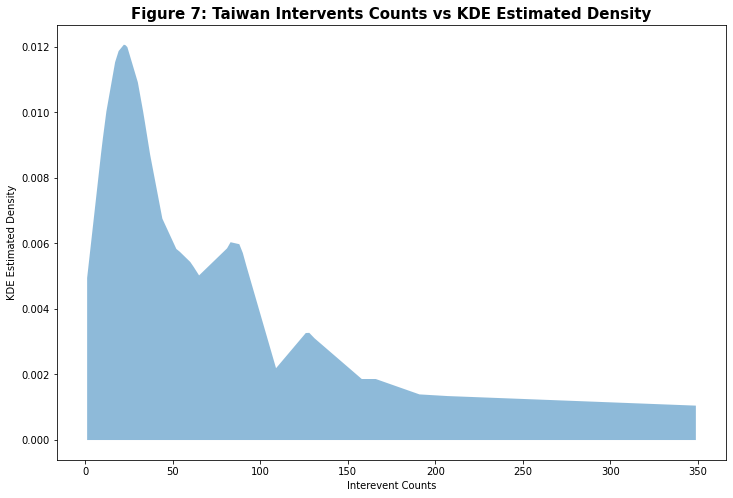

In [ ]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=10.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x[:, None])

fig = plt.subplots(figsize=(12, 8))
plt.ylabel('KDE Estimated Density')
plt.xlabel('Interevent Counts')
plt.title('Figure 7: Taiwan Intervents Counts vs KDE Estimated Density', fontweight='bold', fontsize=15)
plt.fill_between(x, np.exp(logprob), alpha=0.5)
plt.show()

##Postprocessing the dataset
> Adding corrresponding probablity estimates to the dataset for later use.

In [ ]:
prob_df = pd.DataFrame(x, columns=['Intervent Counts'])

In [ ]:
prob_df['Probability'] = np.exp(logprob)

In [ ]:
prob_df

,Intervent Counts,Probability
0,1,0.004946
1,9,0.008763
2,9,0.008763
3,10,0.009206
4,12,0.010025
5,17,0.011531
6,19,0.011868
7,19,0.011868
8,22,0.012063
9,23,0.012045


In [ ]:
merged_df = df.merge(prob_df)

In [ ]:
merged_df

,Unnamed: 0,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,Intervent Counts,Probability
0,0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10,0.009206
1,1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24,0.011988
2,1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24,0.011988
3,32,2007-01-25,10:59:17.650000,22.5640,121.9260,36.2,6.0,24,0.011988
4,32,2007-01-25,10:59:17.650000,22.5640,121.9260,36.2,6.0,24,0.011988
5,2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81,0.005849
6,3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22,0.012063
7,4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19,0.011868
8,4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19,0.011868
9,10,1986-11-14,21:20:10.550000,23.9010,121.5740,33.8,7.8,19,0.011868
